In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from math import log2
%matplotlib inline

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.pipeline import make_pipeline
import time
import matplotlib as mpl
from sklearn.ensemble import RandomForestClassifier as RFC


from sklearn.preprocessing import StandardScaler,PowerTransformer,MinMaxScaler,QuantileTransformer,normalize
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import amazon_processor

import pathlib
import os
import sys

In [2]:
# Custom functions
import pathlib
import os
import sys

module_path = pathlib.Path(os.getcwd()).parent
if str(module_path) not in sys.path:
    sys.path.append(str(module_path))
print(sys.path)

from common.dataset_grabber import get_data_path

['/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1/amazon', '', '/home/alexander/ngsuite/ngsolve-install/lib/python3/dist-packages', '/home/alexander/ngsuite/ngsolve-install/bin', '/home/alexander/.local/bin', '/usr/local/sbin', '/usr/local/bin', '/usr/sbin', '/usr/bin', '/sbin', '/bin', '/usr/games', '/usr/local/games', '/snap/bin', '/home/alexander/.vscode/extensions/ms-toolsai.jupyter-2020.11.358541065/pythonFiles', '/home/alexander/.vscode/extensions/ms-toolsai.jupyter-2020.11.358541065/pythonFiles/lib/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/home/alexander/.local/lib/python3.7/site-packages', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/home/alexander/.local/lib/python3.7/site-packages/IPython/extensions', '/home/alexander/.ipython', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1']


In [3]:
datapath_train = get_data_path("Amazon_Review_Data", "amazon_review_ID.shuf.lrn.csv")
display(datapath_train)

PosixPath('/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1/Datasets/Amazon_Review_Data/amazon_review_ID.shuf.lrn.csv')

In [4]:
df_train = pd.read_csv(datapath_train).drop("ID",axis = 1)

df_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000,Class
0,8,6,10,6,7,2,2,2,3,2,...,1,0,0,0,0,0,0,0,0,Chell
1,13,1,13,9,8,8,2,3,2,4,...,4,1,2,1,0,1,0,0,0,Engineer
2,16,7,6,7,9,3,4,2,6,5,...,0,0,0,0,1,0,0,0,0,Grove
3,8,11,10,11,3,7,0,4,2,1,...,0,0,1,0,0,0,2,1,0,Davisson
4,10,11,8,5,3,4,2,5,5,4,...,0,0,0,0,0,0,0,0,0,Wilson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,9,8,5,5,6,2,14,1,4,5,...,0,1,0,0,1,0,1,0,0,Riley
746,6,13,4,6,8,2,7,3,3,2,...,0,0,0,0,1,0,0,0,1,Neal
747,16,11,4,9,9,4,0,3,5,0,...,0,0,0,0,0,1,1,0,4,Messick
748,9,5,4,2,3,7,2,7,1,1,...,0,0,0,0,0,2,0,0,0,Mitchell


# Data explenarision

It containt of numerical values with no missing values. The column "Class" is dividet into 50 different names.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Columns: 10001 entries, V1 to Class
dtypes: int64(10000), object(1)
memory usage: 57.2+ MB


In [6]:
count_classes = df_train["Class"].value_counts()
count_classes

Chell          21
Hayes          20
Lovitt         19
Chachra        19
Shea           18
Lee            18
Agresti        18
Mahlers2nd     18
Davisson       17
Mark           17
Morrison       17
Cholette       17
Nigam          17
Ashbacher      17
Peterson       17
McKee          16
Harp           16
Calvinnme      16
Grove          16
Auken          16
Merritt        16
Neal           16
Robert         16
Janson         16
Riley          16
Sherwin        15
Vernon         15
Cutey          15
Kolln          15
Comdet         15
Messick        14
Bukowsky       14
Corn           14
Koenig         14
Blankenship    14
Walters        13
Power          13
Taylor         13
Lawyeraau      13
Chandler       13
Mitchell       13
Dent           12
Engineer       12
Goonan         12
Brody          11
Wilson         11
Brown          11
Vision         10
Johnson        10
CFH             8
Name: Class, dtype: int64

In [7]:
cleaned = df_train[~df_train['Class'].isin(
["Chell",
"Hayes",
"Chachra",        
"Lovitt",         
"Mahlers2nd",     
"Shea",           
"Lee",            
"Agresti",        
"Mark",           
"Morrison",       
"Cholette",       
"Nigam",         
"Peterson",       
"Davisson",       
"Ashbacher",      
"Grove",          
"Neal",           
"Robert",         
"Calvinnme",      
"Harp",           
"McKee",          
"Riley",         
"Merritt",       
"Auken",          
"Janson"])]

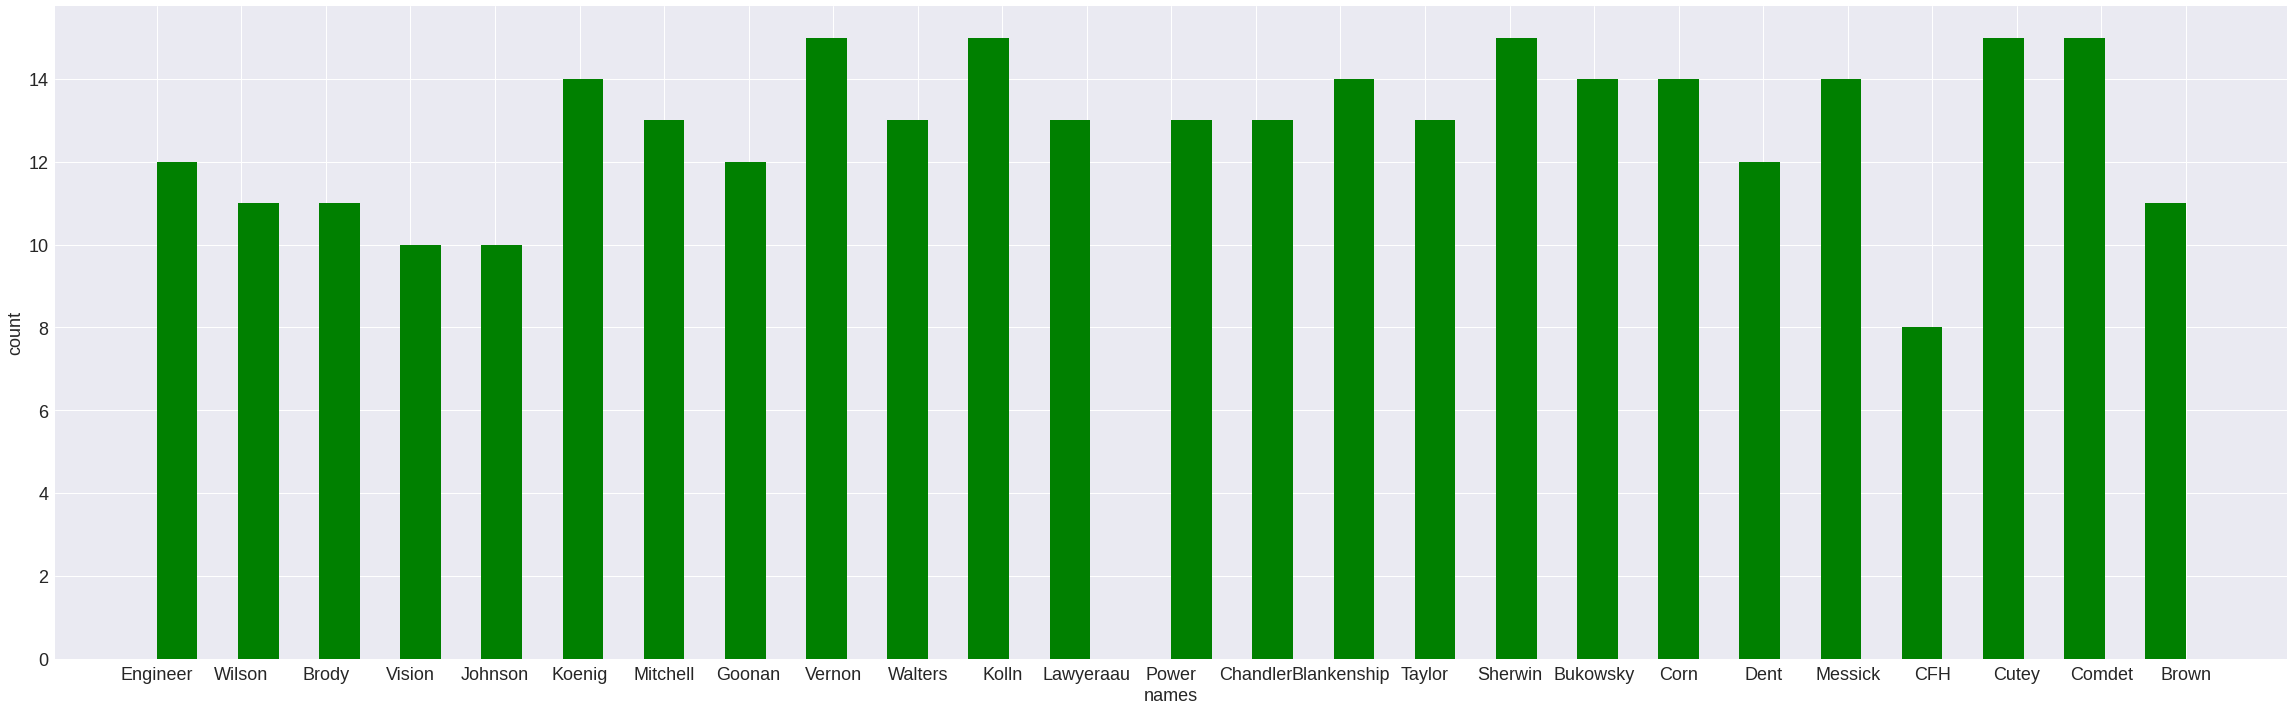

In [8]:
amazon_processor.PlotHist(cleaned,"count","names","fistHalf of the names distribution","fistHalf of the names distribution",50,18)

In [9]:
cleaned = df_train[~df_train['Class'].isin(
["Hayes",
"Chachra",        
"Lovitt",         
"Mahlers2nd",     
"Shea",           
"Lee",
"Chell",
"Vernon",         
"Comdet",         
"Sherwin",       
"Cutey",          
"Kolln",          
"Blankenship",    
"Koenig",         
"Messick",        
"Bukowsky",       
"Corn",           
"Lawyeraau",      
"Mitchell",       
"Walters",        
"Chandler",       
"Taylor",         
"Power",          
"Engineer",       
"Dent",           
"Goonan",         
"Brown",          
"Wilson",         
"Brody",          
"Johnson",        
"Vision",         
"CFH",
"Lawyeraau",      
"Mitchell",       
"Walters",        
"Chandler",       
"Taylor",         
"Power",          
"Engineer",       
"Dent",           
"Goonan",         
"Brown",          
"Wilson",         
"Brody",          
"Johnson",        
"Vision", 
"Vernon",         
"Comdet",         
"Sherwin",       
"Cutey",          
"Kolln",          
"Blankenship",    
"Koenig",         
"Messick",        
"Bukowsky",       
"Corn",           
"Lawyeraau",      
"Mitchell",       
"Walters",        
"Chandler",       
"Taylor",         
"Power",          
"Engineer",         
"CFH"] )]

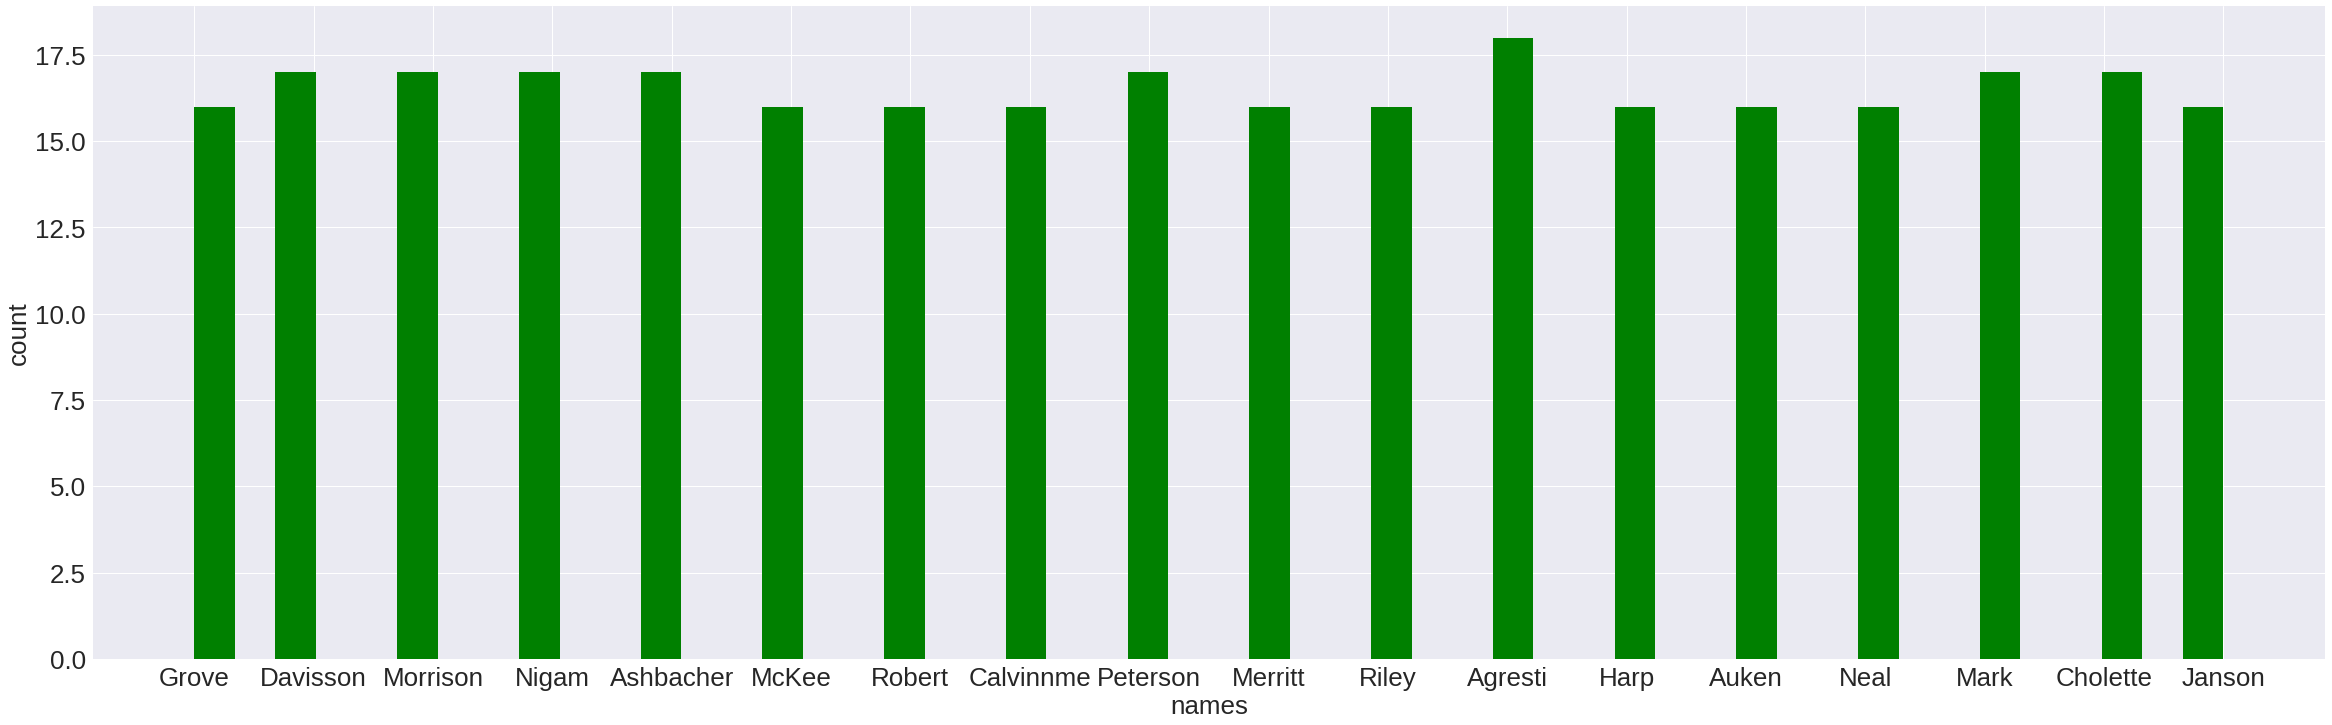

In [15]:
amazon_processor.PlotHist(cleaned,"count","names","fistHalf of the names distribution","fistHalf of the names distribution",50,26)

In [ ]:
cleaned = df_train[~df_train['Class'].isin(
["Vernon",         
"Comdet",         
"Sherwin",       
"Cutey",          
"Kolln",          
"Blankenship",    
"Koenig",         
"Messick",        
"Bukowsky",       
"Corn",           
"Lawyeraau",      
"Mitchell",       
"Walters",        
"Chandler",       
"Taylor",         
"Power",          
"Engineer",       
"Dent",           
"Goonan",         
"Brown",          
"Wilson",         
"Brody",          
"Johnson",        
"Vision",         
"CFH"] )]

In [ ]:
names = ["Chell",         
"Hayes",         
"Lovitt",         
"Lee",            
"Nigam",               
"Auken",          
"Comdet",         
"Corn",           
"Taylor",         
"Engineer",       
"Brody",          
"Vision",        
"CFH"]            

In [ ]:
names = ["Chell",         
"Hayes",         
"Lovitt",         
"Lee"]  

In [ ]:
indexNames = []
cleand = df_train
for j in names:
    indexNames = df_train[ (df_train['Class'] == j)].index
    cleand = df_train.drop(indexNames , inplace=True)



In [ ]:
cleand

In [ ]:
for i in range(len(df_train)):
    for j in names:
        if(df_train["Class"][i] == j):
            #clean= df_train.drop(i)

In [ ]:
cleaned

In [ ]:
amazon_processor.PlotHist(df_train,"count","names","secondHalf of the names distribution","secondHalf of the names distribution",50,18)

In [ ]:
df_train["Class"].value_counts()

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [12, 30, 1, 8, 22]
bars2 = [28, 6, 16, 5, 10]
bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['8', '10', '11', '12', '13'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

In [ ]:
feature = df_train.loc[:,'V1':'V10000']
target = df_train.loc[:,'Class':'Class']

In [ ]:
df_train.head()

In [ ]:
pd.unique(target.Class)

# Data preperation

Main goal is to reduce the number of columns to save runtime and computing power

## k-Best method

In [ ]:
k = 3
feature_kb = SelectKBest(chi2, k=k).fit_transform(feature, target)
feature_kb.shape

## PCA

In [ ]:
pca = PCA(n_components=k)
feature_PCA = pca.fit(feature.values).transform(feature.values)
feature_PCA.shape
pd.DataFrame(feature_PCA)

## function outputs

In [ ]:
def FeatureSelection_kBest(k):
    return SelectKBest(chi2, k=k)

def FeatureSelection_PCA(k):
    return PCA(n_components=k)


In [ ]:
def Preprocessing_Amazon(df_train, df_target, feature_method = "kBest", k = 50, per = 0.8, scale_method = "standard"):
    if(feature_method == "kBest"):
        fea = FeatureSelection_kBest(k)
        df_train = fea.fit_transform(df_train, df_target)
    if(feature_method == "PCA"):
        fea = FeatureSelection_PCA(k)
        df_train = fea.fit(df_train.values).transform(df_train.values)

    if(scale_method == "standard"):
        scl = StandardScaler() 
    if(scale_method == "minmax"):
        scl = MinMaxScaler()
    if(scale_method == "quantil"):
        scl = QuantileTransformer()
    
    scl.fit(df_train)
    df_train = scl.transform(df_train)

    return pd.DataFrame(df_train)

In [ ]:
df_preproc = Preprocessing_Amazon(feature, target,feature_method = "kBest",scale_method = "standard", k = 50)
df_preproc.head()